<a href="https://colab.research.google.com/github/Jswirls/SchoolAssignments/blob/main/INET4061_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font color="#483D8B">
<h1 align="center">Reddit Comment Analysis</h1>
<h3 align="center"> INET4061 Final Project  </h3>
<h5 align="center"> Group 6  </h5>

</font>

---------------

#Overview

Our objective in the Analysis is to get a general understanding of the opinions of users on Reddit, one of the top social media sites on the internet which currently has more than 100k active communities and more than 50 billion monthly views. By understanding the most popular opinions of reddit we will be able to better understand the views of its users. This can be helpful in many different fields. A stock investor could use it to better understand people's views on a company, A company could use it to better understand people's views on their products, or a politician could use it to understand how people view them. By properly utilizing this data these entities can optimize their strategies based on how they think the common consensus will affect them.

Resources:
+ https://www.redditinc.com/
+ https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk


#Data

Data was provided by reddit user Stuck_In_the_Matrix, it consists of approximitly 1.7 billion reddit comments in JSON format. The collection ranges from Oct-2007 to May-2015 and is said to contain reddit's entire publically available comment dataset.
 
The data set contains the following variables
+ comment body
+ score
+ if their score is hidden
+ upvotes
+ downvotes
+ subreddit
+ author
+ author flair
+ date of post
+ date of post archival
+ gilded
+ if the post was edited
+ if the post was marked controversial
 
For the purposes of this exercise, we will only be looking at January of 2015, this limits our 1 terabyte dataset to a much more manageable 30GB data set consisting of 53,851,542 comments. Additionally since we are doing a text analysis we will be reducing our variables to the following during our conversion from a JSON to CVS file:
+ comment body
+ score
 
Data Source:
+ https://www.reddit.com/r/datasets/comments/3bxlg7/i_have_every_publicly_available_reddit_comment/
 


##Imports

In [ ]:
!pip3 install ijson

In [ ]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_csv
import statsmodels.api as sm
import ijson
import csv

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Convert data to CSV

In [ ]:
'''
from google.colab import files
with open('/content/drive/MyDrive/INET4061FinalProject/data') as f, open("/content/drive/MyDrive/INET4061FinalProject/clean_data.cvs", "w") as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(["score","body"])
    for line in f:
        try:
            body = ''
            for item in ijson.items(line,'body'):
                body = item

            body=body.strip()
            body=body.replace("\n","")
            if ('delete' in body): continue
            if len(body) == 0: continue
            if ('Your submission was removed' in body): continue

            score = None
            for item in ijson.items(line,'score'):
                score = item
            if score == None: continue

            csvout.writerow([int(score), str(body)]),

        except Exception as e:
          print(e)
'''

'\nfrom google.colab import files\nwith open(\'/content/drive/MyDrive/INET4061FinalProject/data\') as f, open("/content/drive/MyDrive/INET4061FinalProject/clean_data.cvs", "w") as outfile:\n    csvout = csv.writer(outfile)\n    csvout.writerow(["score","body"])\n    for line in f:\n        try:\n            body = \'\'\n            for item in ijson.items(line,\'body\'):\n                body = item\n\n            body=body.strip()\n            body=body.replace("\n","")\n            if (\'delete\' in body): continue\n            if len(body) == 0: continue\n            if (\'Your submission was removed\' in body): continue\n\n            score = None\n            for item in ijson.items(line,\'score\'):\n                score = item\n            if score == None: continue\n\n            csvout.writerow([int(score), str(body)]),\n\n        except Exception as e:\n          print(e)\n'

Here we convert our JSON data set to CSV while also removing deleted or removed posts, posts with hidden scores, and changing our variables to only include score and comment body

##Import created CSV data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv (r'/content/drive/MyDrive/INET4061FinalProject/clean_data.cvs')

KeyboardInterrupt: ignored

#EDA

###Data shape

In [ ]:
df.shape

(50436513, 2)

After converting our dataset to CVS and ignoring the deleted, without body, and without score comments, we are left with a dataset containing 50,436,513 entries

###Count of NaNs

In [ ]:
print("Count of NaN: \n" + str(df.isnull().sum().sum()))

Count of NaN: 
206


206 NaN values were found

###Remove NaNs

In [ ]:
df.dropna()

,score,body
0,14,Most of us have some family members like this....
1,3,But Mill's career was way better. Bentham is l...
2,1,"Mine uses a strait razor, and as much as i lov..."
3,2,"Very fast, thank you!"
4,6,"The guy is a professional, and very good at wh..."
...,...,...
50436508,1,"Shhh, let's not turn this murder into a rape."
50436509,2,I use the lee filter system. That way I...
50436510,1,Because it's set to flash by default (which is...
50436511,1,looks good


After dropping NaN values we are left with a dataset that has 50,436,307 entries. 

###Data Description

In [ ]:
df.describe().round(2)

,score
count,50436513.00
mean,5.47
std,47.70
min,-1941.00
25%,1.00
50%,1.00
75%,3.00
max,6597.00


Our data has a maximum negative comment score of -1,941 and a maximum positive comment score of 6,597. Our average comment score is 4.47 over the starting comment score of 1, meaning that the majority of votes are positive.
 


###Data Sample

In [ ]:
df.head(10)

,score,body
0,14,Most of us have some family members like this....
1,3,But Mill's career was way better. Bentham is l...
2,1,"Mine uses a strait razor, and as much as i lov..."
3,2,"Very fast, thank you!"
4,6,"The guy is a professional, and very good at wh..."
5,1,"This is a great question, and I want to thank ..."
6,1,Is the IE-Shiv-Ghostblade-Zerks-LW-BT Still no...
7,1,:D.
8,2,I don't know how to describe it. Gently pinch...
9,2,says you my g


Our data set is not organized

###Organize Data by score

In [ ]:
df = df.sort_values(by=['score'])

In [ ]:
df.head()

,score,body
27681259,-1941,"Oh, bitch please. You've been threatening to l..."
32412658,-1588,"You hush with your facts, these things only wo..."
18890275,-1141,"Hi Carlos, I'm a die hard Datsun/Nissan fan th..."
18858922,-1052,What was your first car?
49355643,-964,"I appreciate the effort you put into this, but..."


In [ ]:
df.tail()

,score,body
4703922,5831,This same Gaston refused to sign my bicep 2 da...
20535593,5835,This is actually a good question that can illu...
25763001,6105,Should have sent Zack a dick pic.
28935009,6448,Am I the only person pissed off that she has t...
19926851,6597,"I can answer this one. For some reason, I att..."


##Split data into positive and negative score sets

In [ ]:
setsize = int(len(df)*0.0005)
df_negative_scores = df.head(setsize)
df_positive_scores = df.tail(setsize)

Split into positive and negative datasets by taking the top/bottom 0.05% of comments. totalling 25,218 comments for each set. This way we get popular negative/positive posts.

###Describe Split Data

In [ ]:
print('Negative Data')
print(df_negative_scores.describe())
print('\nPositive Data')
print(df_positive_scores.describe())

Negative Data
              score
count  25218.000000
mean     -55.532556
std       42.097860
min    -1941.000000
25%      -59.000000
50%      -44.000000
75%      -37.000000
max      -32.000000

Positive Data
              score
count  25218.000000
mean    1685.013720
std      847.231538
min      848.000000
25%     1047.000000
50%     1385.000000
75%     2064.000000
max     6597.000000


Our negative data ranges from -32 to -1,941 with a mean of -55.53 and a standard deviation of 42.1. 

Our positive data ranges from 848 to 6,597 with a mean of 1,685 and a standard deviation of 847.2

Our positive data set has a larger range of values, standard deviation

##Plot Split Data

(848.0, 5848.0)

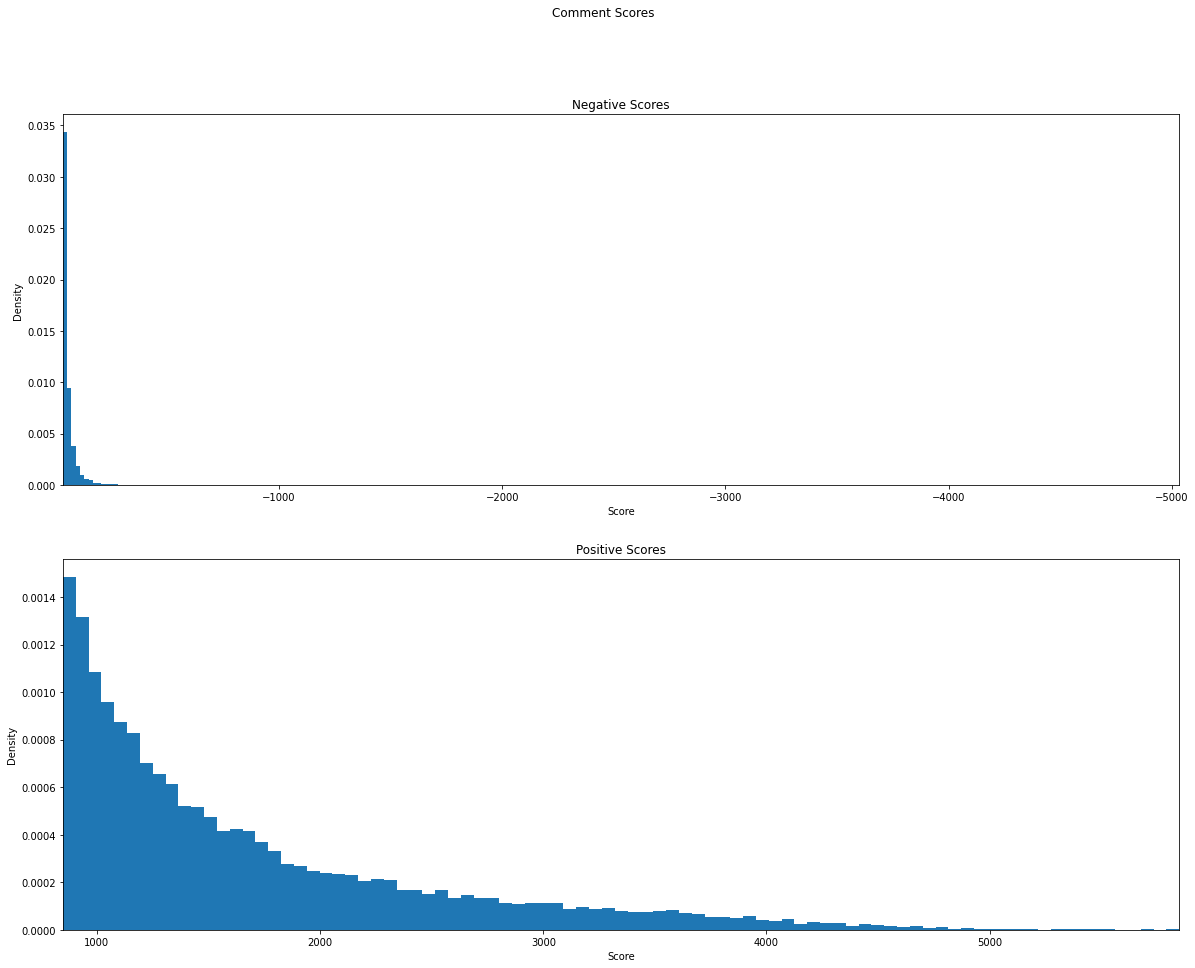

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Comment Scores')
fig.set_figwidth(20)
fig.set_figheight(15)


ax1.hist(df_negative_scores['score'], bins = 100, density = True);
ax1.set_title('Negative Scores')
ax1.set(xlabel='Score', ylabel='Density')
ax1.set_xlim([df_negative_scores.iloc[-1]['score'], df_negative_scores.iloc[-1]['score']-5000])


ax2.hist(df_positive_scores['score'], bins = 100, density = True);
ax2.set_title('Positive Scores')
ax2.set(xlabel='Score', ylabel='Density')
ax2.set_xlim([df_positive_scores.iloc[0]['score'], df_positive_scores.iloc[0]['score']+5000])

We can clearly see that our positive scores have much higher occurrences of large values compared to our negative scores. This makes sense as reddit likely does not promote negative comments. Meaning that extremely negative comments likely occur due to them being as a reply to an extremely positive post, or if they go viral due to how unpopular the opinion is. 
 


#Models

In [ ]:
pos_comments = df_positive_scores["body"].to_numpy()
neg_comments = df_negative_scores["body"].to_numpy()

In [ ]:
#Code outline taken from exercise 11, https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

pos_token_comments = [word_tokenize(i) for i in pos_comments]
neg_token_comments = [word_tokenize(i) for i in neg_comments]

Tokenizes the comments so that indvidual words can be looked at.

In [ ]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

Word Lemmatizer so that verisions of a word are grouped together

In [ ]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if  tag.startswith("NNP") and len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

Removes Noisy words like the, a, an ect. Takes in a list of words specificaly to remove. Lemmatizes the word before hand to make sure it takes out potentially different versions of a word that should be removed

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append("'s")
stop_words.append("n't")
stop_words.append("'m")
stop_words.append('``')
stop_words.append("''")
stop_words.append("'")
stop_words.append('"')
pos_cleaned_tokens_list = []
neg_cleaned_tokens_list = []

for tokens in pos_token_comments:
    pos_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in neg_token_comments:
    neg_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

Takes all the stopwords from nltk, plus some added phrases that were not being removed. It then passes these words into the remove noise function from before The result gives all relevant words for both lists.

In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(pos_cleaned_tokens_list)
all_neg_words = get_all_words(neg_cleaned_tokens_list)

In [ ]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
freq_dist_neg = FreqDist(all_neg_words)

Gets the frequency distrabution for both the positive and negative datasets

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

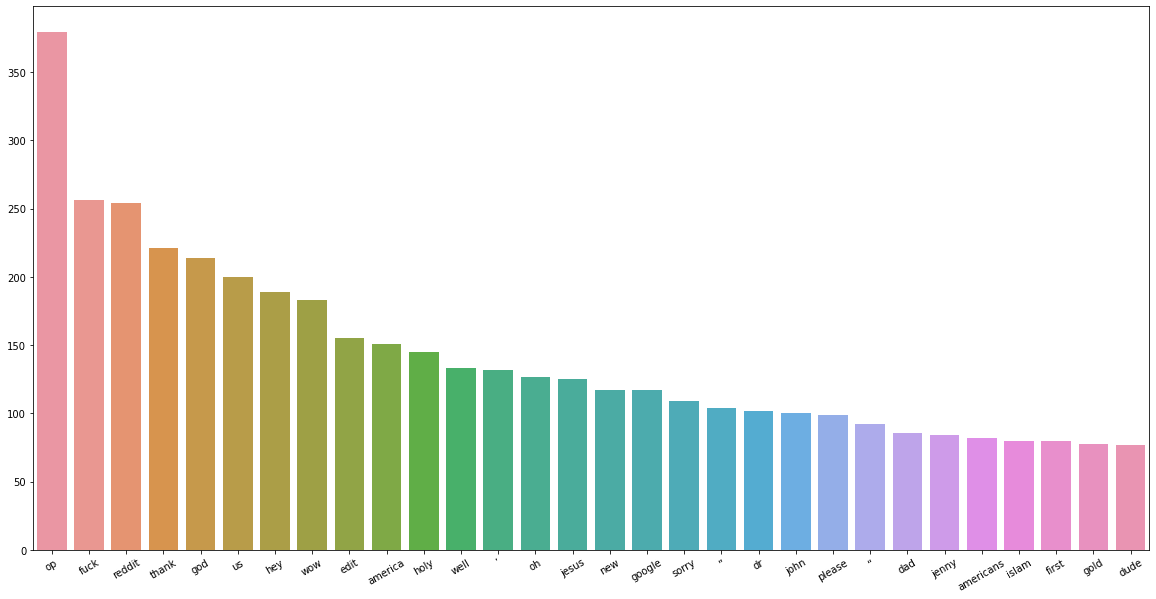

In [ ]:
all_fdist = freq_dist_pos.most_common(30)

all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(20,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

The graph shows frequency of the positive words used most, op means original poster, and is commonly used on reddit to refer to the author of the post. This is why it is so high. The rest make some sense to their ranking.

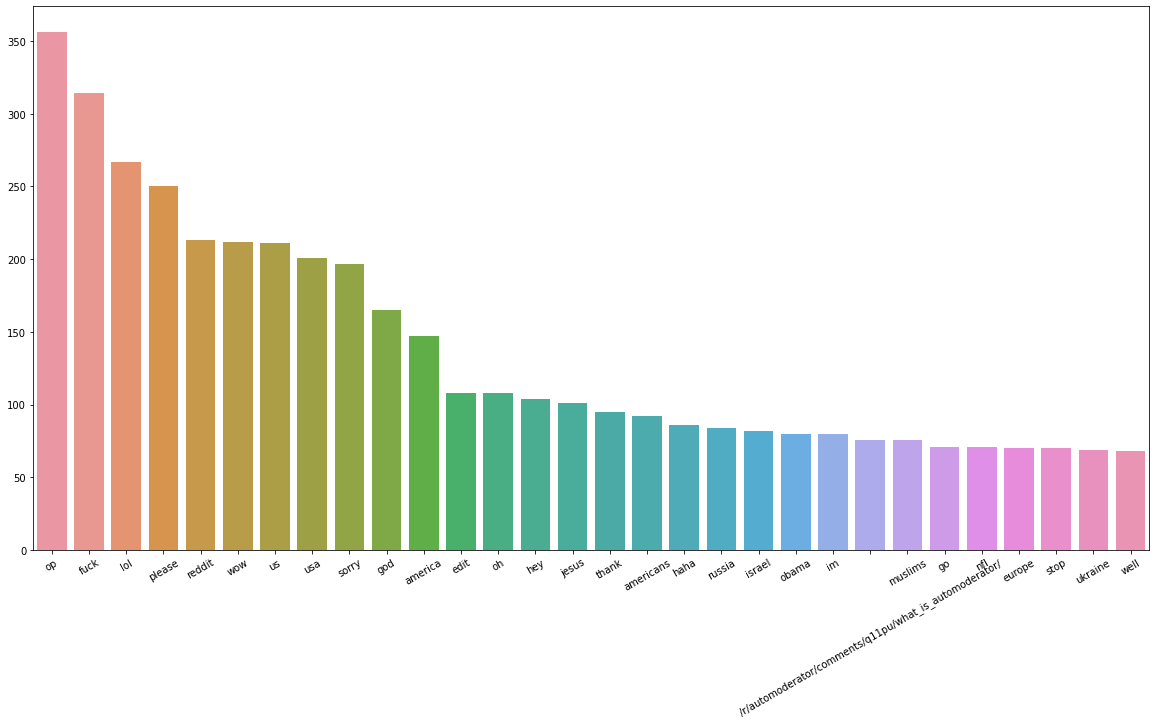

In [ ]:
all_fdist = freq_dist_neg.most_common(30)

all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(20,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

The graph shows frequency of the negative words used most. A lot of words are similar to the postive version, which may make sense as they are common words, however their are some differences, such as lol being third here and not even on the top 30 list for positive comments.

In [ ]:
def comments_for_model(cleaned_tokens_list):
    for comm_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in comm_tokens)

positive_tokens_for_model = comments_for_model(pos_cleaned_tokens_list)
negative_tokens_for_model = comments_for_model(neg_cleaned_tokens_list)

In [ ]:
import random
positive_dataset = [(comm_dict, "Positive") for comm_dict in positive_tokens_for_model]
negative_dataset = [(comm_dict, "Negative") for comm_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:35000]
test_data = dataset[35000:]

Creates a random test and training dataset from the data. About 70% of the data is used in the training set and 30% in the testing dataset.

In [ ]:
#https://www.nltk.org/_modules/nltk/classify/naivebayes.html
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.5540295413319513
Most Informative Features
                     dad = True           Positi : Negati =     20.2 : 1.0
                 arsenal = True           Negati : Positi =     18.3 : 1.0
                downvote = True           Negati : Positi =     15.0 : 1.0
                   space = True           Positi : Negati =     14.3 : 1.0
                     dae = True           Negati : Positi =     13.8 : 1.0
                     ben = True           Positi : Negati =     13.7 : 1.0
                  amazon = True           Positi : Negati =      9.7 : 1.0
               starbucks = True           Positi : Negati =      9.7 : 1.0
                    pats = True           Negati : Positi =      9.3 : 1.0
                      gg = True           Negati : Positi =      9.0 : 1.0
None


While the Naive Bayes Classifer isn't amazingly accurate, with an accuracy of .55, it is still slightly more accurate then a coinflip meaning that there are at least some features that help it guess. Some of the best features are shown, with some making more sense then others. Interesting this suggests amazon and starbucks are in more postivly voted comments, however this doesn't always mean that the companies themselves are viewed positivly, as a lot of the time comments speaking negativly of a comapany will still be upvoted.

In [ ]:
frames = [df_positive_scores, df_negative_scores]
dfr = pd.concat(frames)
mydata = dfr.drop(['score'], axis=1)
mydata.head()

,body
50322924,the kind of abuse of power i can get used to
49103652,"this is just crazy, he really wants his 2k rat..."
6171234,It's true :(
28519255,I have always appreciated his philosophy. Over...
26635877,Having sex with a tranquilized mattress. CONTR...


Creating a dataframe that consist of 50,000 comments compared to 50 million. Although there is less data to train, the prediction results were similar.

In [ ]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
# Cleaning the text in the review column
mydata['Cleaned'] = mydata['body'].apply(clean)
mydata.head()

,body,Cleaned
50322924,the kind of abuse of power i can get used to,the kind of abuse of power i can get used to
49103652,"this is just crazy, he really wants his 2k rat...",this is just crazy he really wants his k ratin...
6171234,It's true :(,It s true
28519255,I have always appreciated his philosophy. Over...,I have always appreciated his philosophy Over ...
26635877,Having sex with a tranquilized mattress. CONTR...,Having sex with a tranquilized mattress CONTRI...


Preparing the data for tokenization. Removing uneccessary characters.

In [ ]:
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text)) 
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned'].apply(token_stop_pos)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


With this function, we add tags to each of the words to give it different sentimental value. 

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
          lemma = word
          lemma_rew = lemma_rew + " " + lemma
      else:
          lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
          lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,body,Cleaned,POS tagged,Lemma
50322924,the kind of abuse of power i can get used to,the kind of abuse of power i can get used to,"[(kind, n), (abuse, n), (power, n), (get, v), ...",kind abuse power get use
49103652,"this is just crazy, he really wants his 2k rat...",this is just crazy he really wants his k ratin...,"[(crazy, a), (really, r), (wants, v), (k, n), ...",crazy really want k rating go
6171234,It's true :(,It s true,"[(true, a)]",true
28519255,I have always appreciated his philosophy. Over...,I have always appreciated his philosophy Over ...,"[(always, r), (appreciated, v), (philosophy, n...",always appreciate philosophy year make point...
26635877,Having sex with a tranquilized mattress. CONTR...,Having sex with a tranquilized mattress CONTRI...,"[(sex, n), (tranquilized, a), (mattress, n), (...",sex tranquilized mattress CONTRIBUTE woman l...


The lemmentization process getting the definition word of the root. the POS tag helps in this process by getting the correct definition.

In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
     return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

Goes through the lemmentized words and uses the textblob library to use the built in sentiment analysis using subjectivity and polarity.

In [ ]:
fin_data = pd.DataFrame(mydata[['body', 'POS tagged', 'Lemma']])
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,body,POS tagged,Lemma,Polarity,Analysis
50322924,the kind of abuse of power i can get used to,"[(kind, n), (abuse, n), (power, n), (get, v), ...",kind abuse power get use,0.600000,Positive
49103652,"this is just crazy, he really wants his 2k rat...","[(crazy, a), (really, r), (wants, v), (k, n), ...",crazy really want k rating go,-0.200000,Negative
6171234,It's true :(,"[(true, a)]",true,0.350000,Positive
28519255,I have always appreciated his philosophy. Over...,"[(always, r), (appreciated, v), (philosophy, n...",always appreciate philosophy year make point...,0.136364,Positive
26635877,Having sex with a tranquilized mattress. CONTR...,"[(sex, n), (tranquilized, a), (mattress, n), (...",sex tranquilized mattress CONTRIBUTE woman l...,-0.300000,Negative


In [ ]:
counts = fin_data.Analysis.value_counts()
counts

Positive    20754
Neutral     15387
Negative    14295
Name: Analysis, dtype: int64

In [ ]:
pos_data = df_positive_scores.drop(['score'], axis=1)
pos_data['Cleaned'] = pos_data['body'].apply(clean)
pos_data['POS tagged'] = pos_data['Cleaned'].apply(token_stop_pos)
pos_data['Lemma'] = pos_data['POS tagged'].apply(lemmatize)
fin_pos_data = pd.DataFrame(pos_data[['body', 'POS tagged', 'Lemma']])
fin_pos_data['Polarity'] = fin_pos_data['Lemma'].apply(getPolarity) 
fin_pos_data['Analysis'] = fin_pos_data['Polarity'].apply(analysis)
fin_pos_data.head()

,body,POS tagged,Lemma,Polarity,Analysis
50322924,the kind of abuse of power i can get used to,"[(kind, n), (abuse, n), (power, n), (get, v), ...",kind abuse power get use,0.600000,Positive
49103652,"this is just crazy, he really wants his 2k rat...","[(crazy, a), (really, r), (wants, v), (k, n), ...",crazy really want k rating go,-0.200000,Negative
6171234,It's true :(,"[(true, a)]",true,0.350000,Positive
28519255,I have always appreciated his philosophy. Over...,"[(always, r), (appreciated, v), (philosophy, n...",always appreciate philosophy year make point...,0.136364,Positive
26635877,Having sex with a tranquilized mattress. CONTR...,"[(sex, n), (tranquilized, a), (mattress, n), (...",sex tranquilized mattress CONTRIBUTE woman l...,-0.300000,Negative


In [ ]:
neg_data = df_negative_scores.drop(['score'], axis=1)
neg_data['Cleaned'] = neg_data['body'].apply(clean)
neg_data['POS tagged'] = neg_data['Cleaned'].apply(token_stop_pos)
neg_data['Lemma'] = neg_data['POS tagged'].apply(lemmatize)
fin_neg_data = pd.DataFrame(neg_data[['body', 'POS tagged', 'Lemma']])
fin_neg_data['Polarity'] = fin_neg_data['Lemma'].apply(getPolarity) 
fin_neg_data['Analysis'] = fin_neg_data['Polarity'].apply(analysis)
fin_neg_data.head()

,body,POS tagged,Lemma,Polarity,Analysis
27681259,"Oh, bitch please. You've been threatening to l...","[(Oh, None), (bitch, n), (please, n), (threate...",Oh bitch please threaten leave us month leav...,0.000000,Neutral
32412658,"You hush with your facts, these things only wo...","[(hush, v), (facts, n), (things, n), (work, v)...",hush fact thing work cherry pick data,0.000000,Neutral
18890275,"Hi Carlos, I'm a die hard Datsun/Nissan fan th...","[(Hi, n), (Carlos, n), (die, a), (hard, a), (D...",Hi Carlos die hard Datsun Nissan fan glad se...,0.221667,Positive
18858922,What was your first car?,"[(first, a), (car, n)]",first car,0.250000,Positive
49355643,"I appreciate the effort you put into this, but...","[(appreciate, v), (effort, n), (put, v), (know...",appreciate effort put know post album like c...,-0.300000,Negative


In [ ]:
counts = fin_pos_data.Analysis.value_counts()
counts

Positive    10582
Neutral      8557
Negative     6079
Name: Analysis, dtype: int64

In [ ]:
counts = fin_neg_data.Analysis.value_counts()
counts

Positive    10172
Negative     8216
Neutral      6830
Name: Analysis, dtype: int64

Performs sentiment anaysis on the individual positive and negative dataset. It can be seen that the ratio of positive/negative/neutral is pretty similar for both, suggesting the sentiment of the comment doesn't signal a postive or negativly upvoted comment

In [ ]:
#https://blog.devgenius.io/training-an-ml-model-for-sentiment-analysis-in-python-63b6b8c68792
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
punctuations = string.punctuation
parser = English()
stopwords = list(STOP_WORDS)
def spacy_tokenizer(utterance):
      tokens = parser(utterance)
      return [token.lemma_.lower().strip() for token in tokens if token.text.lower().strip() not in stopwords and token.text not in punctuations]


In [ ]:
from sklearn.model_selection import train_test_split
comments = fin_data['Lemma'].values
labels = fin_data['Analysis'].values
comments_train, comments_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, random_state=50436)

Using the lemma and analysis to train the data. The analysis will have positive, neutral or negative for teaching the model.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
vectorizer.fit(comments_train)

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7ff5cc92a680>)

In [ ]:
X_train = vectorizer.transform(comments_train)
X_test = vectorizer.transform(comments_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracy = classifier.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.893735130848533


The logistic regression classifier is used here beacuse of the values of the target values are categorical, and binary, where the positive and negative are 0 or a 1. The accuracy here is good at 89% in predicting reviews sentiments.

In [ ]:
df_positive_scores['scores'] = 'pos'
df_negative_scores['scores'] = 'neg'
frames = [df_positive_scores, df_negative_scores]
dfrs = pd.concat(frames)
scoredata = dfrs.drop(['body'], axis=1)
scoredata = dfrs.drop(['score'], axis=1)
fin_data = pd.concat([fin_data,scoredata], axis=1)

In [ ]:
fin_data.head()

,body,POS tagged,Lemma,Polarity,Analysis,scores
50322924,the kind of abuse of power i can get used to,"[(kind, n), (abuse, n), (power, n), (get, v), ...",kind abuse power get use,0.600000,Positive,pos
49103652,"this is just crazy, he really wants his 2k rat...","[(crazy, a), (really, r), (wants, v), (k, n), ...",crazy really want k rating go,-0.200000,Negative,pos
6171234,It's true :(,"[(true, a)]",true,0.350000,Positive,pos
28519255,I have always appreciated his philosophy. Over...,"[(always, r), (appreciated, v), (philosophy, n...",always appreciate philosophy year make point...,0.136364,Positive,pos
26635877,Having sex with a tranquilized mattress. CONTR...,"[(sex, n), (tranquilized, a), (mattress, n), (...",sex tranquilized mattress CONTRIBUTE woman l...,-0.300000,Negative,pos


In [ ]:
from sklearn.model_selection import train_test_split
comments = fin_data['Lemma'].values
labels = fin_data['scores'].values
comments_train, comments_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, random_state=50436)

In [ ]:
X_train = vectorizer.transform(comments_train)
X_test = vectorizer.transform(comments_test)

In [ ]:
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
vectorizer.fit(comments_train)

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f0d3dda1830>)

In [ ]:
voteclassifier = LogisticRegression()
voteclassifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracy = voteclassifier.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.6887390959555908


The same type of logistic regression used before but this time it checks if the given sentence is upvoted or downvoted based on the words used. It is more accurate than the naive bayes classifier seen before, with an accuracy of .68

In [ ]:
testdata = fin_data[fin_data['body'].str.lower().str.contains("obama")]
posData = testdata[testdata['scores'].str.lower().str.contains("pos")]
negData = testdata[testdata['scores'].str.lower().str.contains("neg")]

print("Count of Upvoted Positive references: ", len(posData[posData['Analysis']=='Positive']), "Downvoted Positive references: ", len(negData[negData['Analysis']=='Positive']))
print("Count of Upvoted Neutral references: ", len(posData[posData['Analysis']=='Neutral']), "Downvoted Neutral references: ", len(negData[negData['Analysis']=='Neutral']))
print("Count of Upvoted Negative references: ", len(posData[posData['Analysis']=='Negative']), "Downvoted Negative references: ", len(negData[negData['Analysis']=='Negative']))

Count of Upvoted Positive references:  39 Downvoted Positive references:  36
Count of Upvoted Neutral references:  13 Downvoted Neutral references:  12
Count of Upvoted Negative references:  20 Downvoted Negative references:  37


In [ ]:
testdata = fin_data[fin_data['body'].str.lower().str.contains("amazon")]
posData = testdata[testdata['scores'].str.lower().str.contains("pos")]
negData = testdata[testdata['scores'].str.lower().str.contains("neg")]

print("Count of Upvoted Positive references: ", len(posData[posData['Analysis']=='Positive']), "Downvoted Positive references: ", len(negData[negData['Analysis']=='Positive']))
print("Count of Upvoted Neutral references: ", len(posData[posData['Analysis']=='Neutral']), "Downvoted Neutral references: ", len(negData[negData['Analysis']=='Neutral']))
print("Count of Upvoted Negative references: ", len(posData[posData['Analysis']=='Negative']), "Downvoted Negative references: ", len(negData[negData['Analysis']=='Negative']))

Count of Upvoted Positive references:  22 Downvoted Positive references:  3
Count of Upvoted Neutral references:  5 Downvoted Neutral references:  0
Count of Upvoted Negative references:  3 Downvoted Negative references:  3


In [ ]:
testdata = result_data[result_data['body'].str.lower().str.contains("tesla")]
posData = testdata[testdata['scores'].str.lower().str.contains("pos")]
negData = testdata[testdata['scores'].str.lower().str.contains("neg")]

print("Count of Upvoted Positive references: ", len(posData[posData['Analysis']=='Positive']), "Downvoted Positive references: ", len(negData[negData['Analysis']=='Positive']))
print("Count of Upvoted Neutral references: ", len(posData[posData['Analysis']=='Neutral']), "Downvoted Neutral references: ", len(negData[negData['Analysis']=='Neutral']))
print("Count of Upvoted Negative references: ", len(posData[posData['Analysis']=='Negative']), "Downvoted Negative references: ", len(negData[negData['Analysis']=='Negative']))

Count of Upvoted Positive references:  9 Downvoted Positive references:  2
Count of Upvoted Neutral references:  4 Downvoted Neutral references:  2
Count of Upvoted Negative references:  3 Downvoted Negative references:  2


#Conclusion

To wrap up, we looked at several models to analysis reddit comments. While the Naive Bayes Classifier show interesting results, its accuracy was not adequate when compared to the Logistic Regression models. For this reason, the Logistic Regression models are going to be the main focus.

Looking more at the first Logistic Regression model named classifier we can see how accurate it is outside of the accuracy score. One of the ways of doing this is by looking at the confusion matrix.
(https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2471  192  240]
 [  33 2955   94]
 [ 234  300 3569]]


The results from the confusion matrix tell us that:

The model predicted 2,471 of the negative comments correctly and incorrectly predicted 192 of the negative comments as neutral and 240 of the negative comments as positive comments.

The model predicted 2,955 of the neutral comments correctly and incorrectly predict 33 of the neutral comments as negative and 94 of the neutral comments as positive.

The model predicted 3,569 of the positive comments correctly and incorrectly predicted 234 of the positive comments as negative and 300 of the positive comments as neutral.


Additional information on the precision score and the recall score can tell us about each category individually. Something to note is one of the downsides of Logistic Regression is not being able to handle a large number of categorical features/variables because of overfitting. Though we cannot see the overall precision and recall, we can view each one separately.

In [ ]:
prec = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
print(prec , recall)

[0.90248356 0.85726719 0.9144248 ] [0.85118843 0.95879299 0.86985133]


Precision looks at how often our model is correct. In our case, the model predicts negative comments right 90% of the time, neutral comments 86% of the time, and positive comments right 91%.

Recall tells us about our test set, if there are comments in the test set that are negative, our model can identify it 85% of the time. The model can identify neutral and positive comments 95% and 86% of the time respectfully.

While the classifier looks at whether the sentiment of the comments is positive or negative. We also want to look whether the sentiment of the comments, that being positive or negative, are upvoted or downvoted. We can do this by using the voteClassifier which also uses Logistic Regression. Determined above the voteClassifier has an accuracy of 68%, below we will look at the confusion matrix, precision and recall.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
y_pred = voteclassifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3387 1701]
 [1439 3561]]


From the confusion matrix the model predicted 3,387 negative comments correctly and incorrectly predicted 1,701 negative comments as positive. The model also predicted 3,561 positive comments correctly and incorrectly predicted 1,439 positive comments as negative comments. 

In [ ]:
prec = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
print(prec , recall)

[0.70182346 0.67673888] [0.66568396 0.7122    ]


For the precision, the model predicted negative comments correct 70% of the time and positive comments correct 67%. For recall, the model identified negative comments in the test set 66% of the time and positive comments in the test set 71% of the time.

While the classifier Logistic model had a higher accuracy than the voteClassifier, it does not make the voteClassifier less important. This can be show when we compare an actual test against the two.

In [ ]:
new_reviews = ['Old version of python useless', 'Very good effort, but not five stars', 'Clear and concise']
X_new = vectorizer.transform(new_reviews)
classifier.predict(X_new)

array(['Negative', 'Positive', 'Positive'], dtype=object)

In [ ]:
new_reviews = ['Old version of python useless', 'Very good effort, but not five stars', 'Clear and concise']
X_new = vectorizer.transform(new_reviews)
voteclassifier.predict(X_new)

array(['pos', 'neg', 'pos'], dtype=object)

The most significant result is from the comment “very good effort, but not five stars”. The classifier predicted this comment to be positive based on the sentiment of the comments being positive. This is most likely because it recognized the words, “good”, “effort”, and “stars” as a positive. However, the viewClassifier classified this comment as negative based on the prediction that this comment would get downvoted and therefore negative. This tells us that even though a comment has a positive sentiment, it can still be viewed as negative and downvoted. This specific comment could be viewed as negative as it is basically a back handed comment. Overall, this makes sense when factoring in how different opinions come together online. Specifically, for reddit there are many subgroups that share similar ideologies. For example, if a meat lover joins a vegan forum and comments “I love meat”, that comment will most likely be down voted. So, even though the classifier model has an 89% accuracy, in the example above, it would mostly like predict the “I love meat” as a positive comment. While the viewClassifier has a 68% accuracy it is a better representation of how the comment context is view.

All in all, this project reviews the sentiment behind reddit comments and identifying whether that sentiment is positive or negative. Our model could be applied in reddit by bots or moderators to help identify comments. Additionally, in other real-world applications, this model could be used in in other forum sites or even on social media sites. Logistic regression has given us an accurate way to easily implement, interpret, and train data.